# Lets Evolve Some Knapsacks!
### Here we're going to generate a population of random collections of items (each with values and weights), and see if we can't evolve some good solutions to filling up our knapsack. 


In [1]:
from numpy import mean, log
from matplotlib import pyplot
import random
random.seed(100)

## I'm creating a class here, which for those of you not as familiar with Object-Oriented programing (OOP) is just a way of saying I'm making a way of interacting with something I decided to call an Item that has associated with it a weight and a value.
If that doesn't make sense yet, working with it should feel intuitive and hopefully start making more sense as you move through the workbook

In [2]:
class Item:
    def __init__(self, weight, value):
        self.weight = weight
        self.value = value
        
    def __repr__(self):
        return "Item value: {0}, weight: {1}".format(self.value, self.weight)

### Now that we have an Item class, we can create a single item (in OOP, this is called an instance) and pass in the weight and value like we defined in the above __init__ function. 
The __init__ function tells python what to do when a new instantiation is created (it is short for initialization) 

### The __repr__ function just tells python how to print this object out when you ask to see it.

In [3]:
an_item = Item(20, 1.8)
print(an_item)

Item value: 1.8, weight: 20


### We can use the weight and value properties associated with each Item now in a programatic way

In [4]:
print(an_item.value)
print(an_item.weight)

if an_item.weight > 10:
    print("That's HEAVY!")

1.8
20
That's HEAVY!


## Let's create a big list of items with random weights and values.
These will be the items we can choose from to fill up our knapsack.

In [5]:
num_items = 1000
max_weight = 200
items = [Item(random.randint(10, 100), random.randint(10, 100)) for _ in range(num_items)]
print(items[1:5])

[Item value: 32, weight: 68, Item value: 60, weight: 100, Item value: 65, weight: 54, Item value: 24, weight: 74]


## We can create a random individual in our population (remember, individuals represent potential solutions to the problem -- in this case a knapsack of items).
For this problem, we want to limit ourselves to one of each item so we need to make sure we don't have duplicates. We also want to start off our population with valid solutions (i.e., ones that don't break our knapsack because they're too heavy). 


In [6]:
def random_individual():
    total_weight = 0
    
    #This is a list of the indexes from the item list
    #the individual has in its knapsack
    org_genotype = []
    
    while(total_weight < max_weight):
        random_item_index = random.randint(0, num_items-1)
        
        #Make sure this item isn't already in our knapsack.
        if random_item_index not in org_genotype:
            
            #But if this item would break our knapsack, 
            #lets just go ahead and call this organism done.
            if total_weight + items[random_item_index].weight > max_weight:
                return org_genotype
            
            #Otherwise we can add this item and keep going!
            else:
                org_genotype.append(random_item_index)
                total_weight += items[random_item_index].weight
    
    return org_genotype

## Let's look at this random individual a bit...

In [7]:
individual = random_individual()
print(individual)

[573, 139, 543]


In [8]:
#We can look at some of the items this individual has
print(items[459])
print(items[702])

Item value: 34, weight: 59
Item value: 21, weight: 46


In [9]:
#We can sum up the items weight to make sure it didn't break our knapsack
weights = [items[idx].weight for idx in individual]
print(weights)
print(sum(weights))

[77, 28, 10]
115


## Now let's make a couple of helper functions to return the individuals total value and total weight from their knapsacks

In [10]:
def get_genotype_value(genotype):
    return sum([items[i].value for i in genotype])

def get_genotype_weight(genotype):
    return sum([items[i].weight for i in genotype])


In [11]:
print(get_genotype_value(individual))
print(get_genotype_weight(individual))

180
115


# 1) Great, we have individuals! Now, how do we implement mutations? 
### This is a rather open ended question, so lets focus for now on point mutations (i.e., exchanging one item in the knapsack for another randomly selected item). 
### Remember, you need to ensure the item is not already in the knapsack!

In [12]:
#IMPLEMENT THIS FUNCTION
def point_mutation(genotype):
    return genotype
    

#Helper function that will work once point_mutation
#is implemeneted.
def mutate_genotype(genotype, prob_mut=0.5):
    #lets make a copy of our genotype
    mutated_genotype = genotype[:]

    #Mutate with some probability
    if random.random() < prob_mut:
        point_mutation(mutated_genotype)
        
    return mutated_genotype


### Mutate_genotype will use your point_mutation function, so we can test it below. For now, this will just return the same genotype, but once your point_mutation function is working you should be able to test it!

In [13]:
for i in range(10):
 print(mutate_genotype(individual, prob_mut=0.2))

[573, 139, 543]
[573, 139, 543]
[573, 139, 543]
[573, 139, 543]
[573, 139, 543]
[573, 139, 543]
[573, 139, 543]
[573, 139, 543]
[573, 139, 543]
[573, 139, 543]


# 2) Now what we have individuals and we can mutate them, how do we assign them a fitness?
## Remember that a solution is valid when the weight is less than max_weight, and a better knapsack is one with more value stuffed in it. 

In [14]:
#IMPLEMENT THIS FUNCTION
def get_genotype_fitness(genotype):
    return 1.0


# This is some generic code that runs the evolution part (basically identical to what you all wrote for the previous worksheets). It will use your fitness function and your point mutation function when they're implemented.

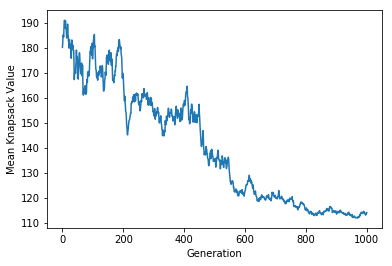

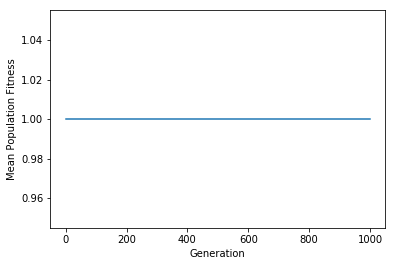

In [15]:
pop_size = 1000
num_generations = 1000

population = [random_individual() for _ in range(pop_size)]
pop_fitness = [get_genotype_fitness(g) for g in population]

#keep track of mean fitness over time
mean_fitnesses = [mean(pop_fitness)]

#also keep track of the mean value of knapsacks overtime
mean_value = mean([get_genotype_value(ind) for ind in population])
mean_values = [mean_value]

for generation in range(num_generations):
    pop_fitness = [get_genotype_fitness(g) for g in population]
    population = random.choices(population, k=pop_size, weights=pop_fitness)
    population = [mutate_genotype(g, prob_mut = 0.01) for g in population]
    
    #record new mean population fitness and knapsack values
    mean_fitnesses.append(mean(pop_fitness))
    mean_values.append(mean([get_genotype_value(ind) for ind in population]))
    
#After evolving solutions, plot some figures
pyplot.figure()
pyplot.plot(mean_values)
pyplot.xlabel("Generation")
pyplot.ylabel("Mean t Value")
pyplot.show()

pyplot.figure()
pyplot.plot(mean_fitnesses)
pyplot.xlabel("Generation")
pyplot.ylabel("Mean Population Fitness")
pyplot.show()

# If you flew through that, think about what other kinds of mutations might be beneficial and implement them. 

# If you want to say some method you implemented was useful for this problem, how would you test it? Try it!